# Analysis and Clustering of Spanish Wines

A beautiful country located on the Iberian Peninsula- Spain is worldly known for its wineries and excellent wines. In this project, I applied Data Analysis, visualizations tools, and a Clustering Model to better understand the wine story that began thousands of years ago.

The dataset includes 7500 entries on wines from all around Spain. We have acces to such variables like winery, wine, year, number of reviews, region, price, type, body and acidity.

In this Data Science project, I want to investigate correlations between the variables and build a Clustering Model that allows for grouping wines based on individual characteristics.

## Preliminary Data Analysis

In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [291]:
wines = pd.read_csv("wines_SPA.csv")

In [292]:
 wines

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [293]:
missing_count=wines.isnull().sum()
missing_percentage = (missing_count / len(wines)) * 100
column_type= wines.dtypes
unique_data=wines.nunique()

missing_data = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage, "Data Type" : column_type}).sort_values(by='Missing Count', ascending=True)

print(missing_data)

             Missing Count  Missing Percentage Data Type
winery                   0            0.000000    object
wine                     0            0.000000    object
rating                   0            0.000000   float64
num_reviews              0            0.000000     int64
country                  0            0.000000    object
region                   0            0.000000    object
price                    0            0.000000   float64
year                     2            0.026667    object
type                   545            7.266667    object
body                  1169           15.586667   float64
acidity               1169           15.586667   float64


In [294]:
wines.nunique()

winery          480
wine            847
year             71
rating            8
num_reviews     817
country           1
region           76
price          1292
type             21
body              4
acidity           3
dtype: int64

**Data Visualizations**

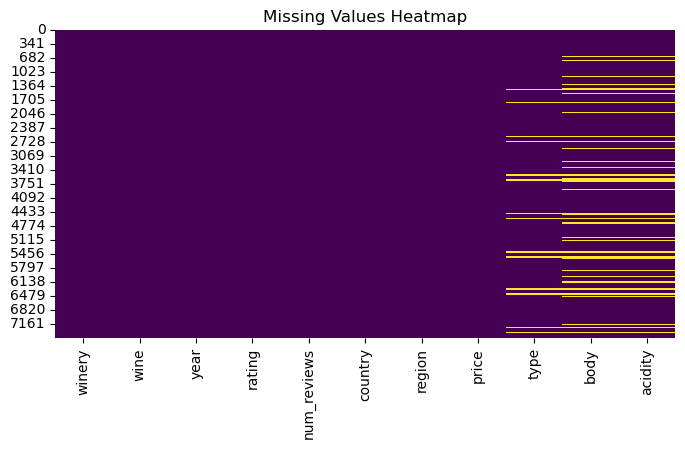

In [295]:
plt.figure(figsize=(8, 4))
sns.heatmap(wines.isnull(), cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap')
plt.show()

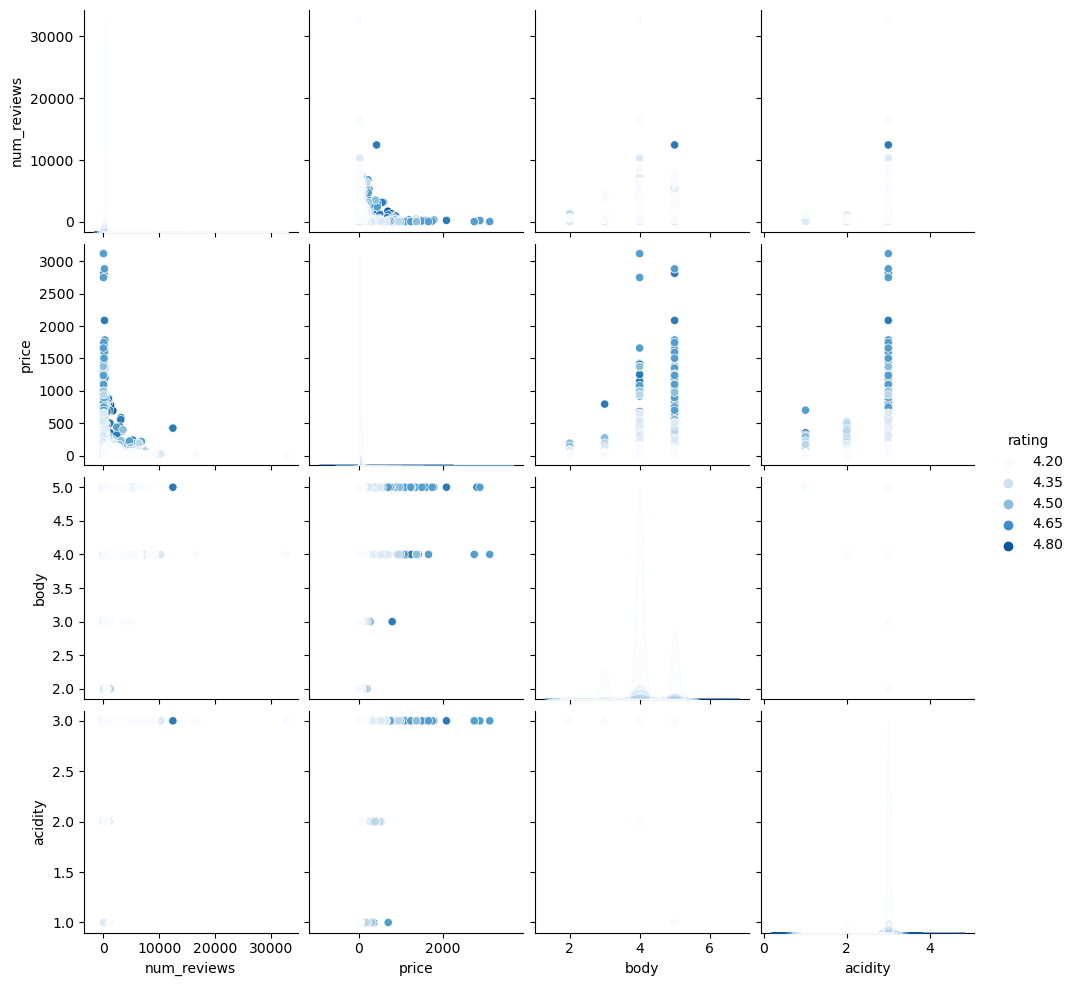

In [296]:
sns.pairplot(wines, hue="rating", palette='Blues')

Text(0.5, 1.0, 'Correlation Heatmap')

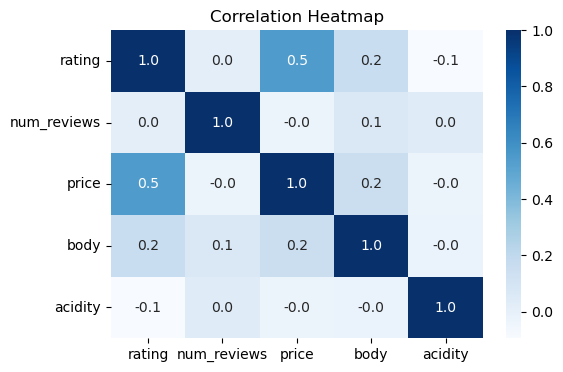

In [297]:
plt.figure(figsize=(6,4))
sns.heatmap(wines.corr(numeric_only=True),annot=True, cmap='Blues', fmt='.1f')
plt.title('Correlation Heatmap')


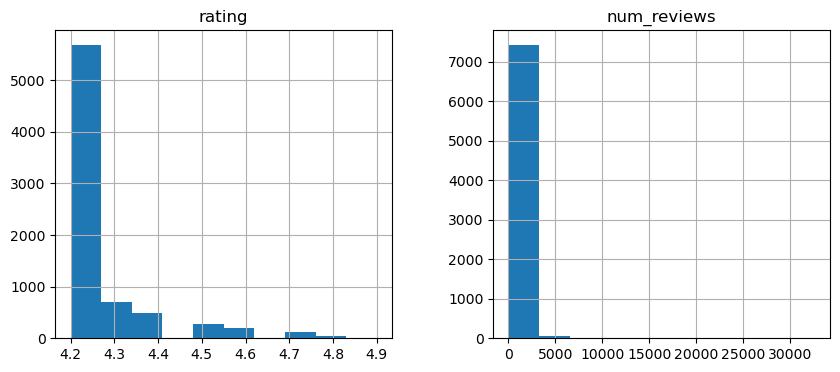

In [298]:
features = ["rating", "num_reviews"]
wines[features].hist(figsize=(10, 4));

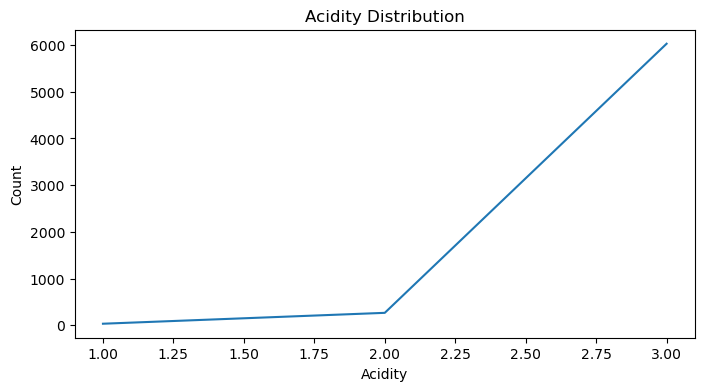

In [299]:
count_acid = wines['acidity'].value_counts()
plt.figure(figsize=(8, 4))
plt.plot(count_acid.index, count_acid.values)
plt.xlabel('Acidity')
plt.ylabel('Count')
plt.title(f'Acidity Distribution')
plt.show()

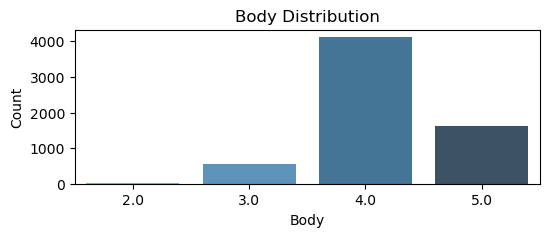

In [300]:
body_counts = wines['body'].value_counts()


plt.figure(figsize=(6, 2))
sns.barplot(x=body_counts.index, y=body_counts,palette='Blues_d' )
plt.xlabel('Body')
plt.ylabel('Count')
plt.title(f'Body Distribution')
plt.show()

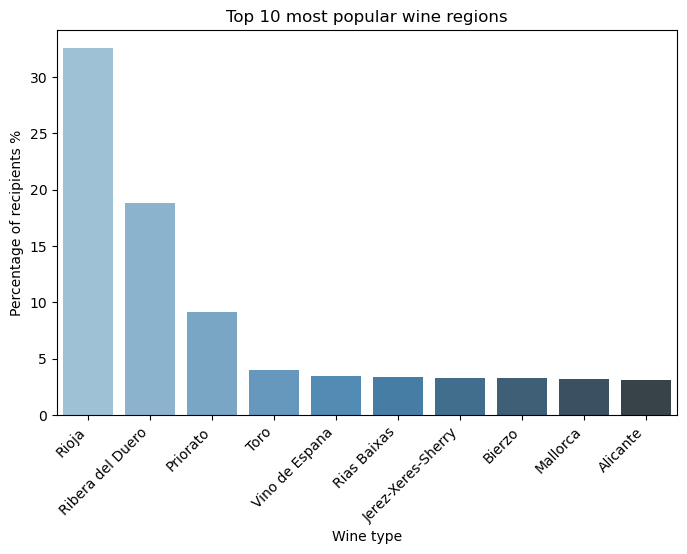

In [301]:

top_n = 10 
top_n_wines = wines['region'].value_counts().head(top_n)
top_n_wines_perc= 100* top_n_wines /len(wines)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_n_wines_perc.index, y=top_n_wines_perc, palette='Blues_d')
plt.xlabel('Wine type')
plt.ylabel('Percentage of recipients %')
plt.title(f'Top {top_n} most popular wine regions')
plt.xticks(rotation=45, ha='right')
plt.show()

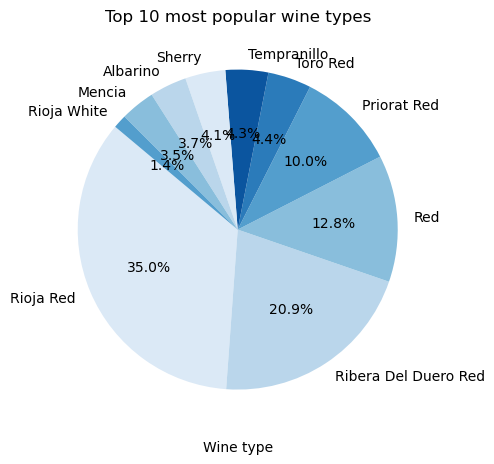

In [302]:

top_n = 10 
top_n_wines = wines['type'].value_counts().head(top_n)
top_n_wines_perc= 100* top_n_wines /len(wines)

plt.figure(figsize=(8, 5))
plt.pie(x=top_n_wines_perc, labels=top_n_wines_perc.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues'))
plt.xlabel('Wine type')
plt.title(f'Top {top_n} most popular wine types')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.2)

plt.show()

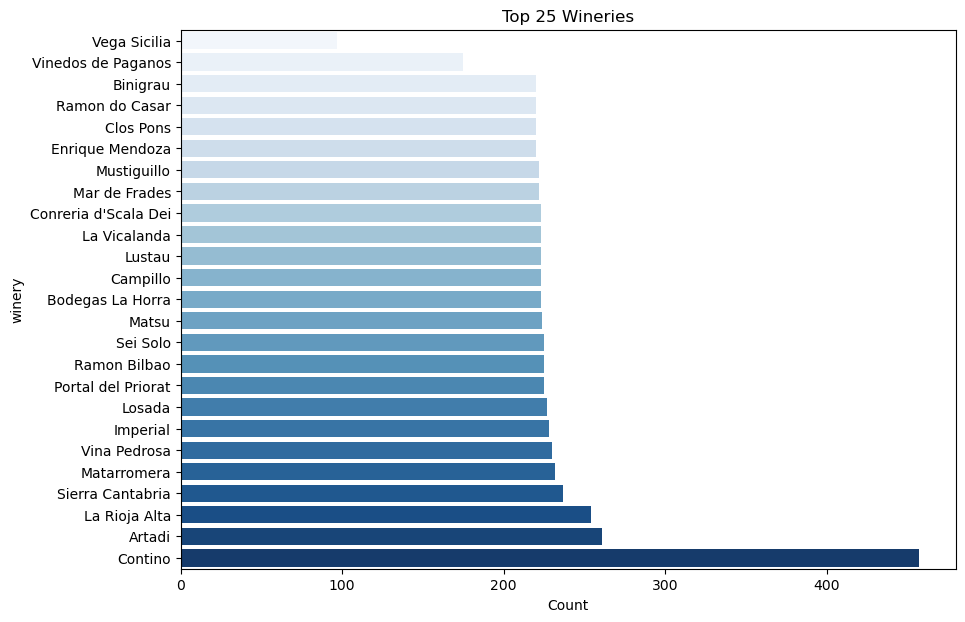

In [303]:
top_n = 25

top_n_wineries = wines['winery'].value_counts().head(top_n)
top_n_wineries = top_n_wineries.sort_values()

plt.figure(figsize=(10, 7))
sns.barplot(x=top_n_wineries, y=top_n_wineries.index, palette='Blues')  # Swap x and y
plt.xlabel('Count')
plt.ylabel('winery')
plt.title(f'Top {top_n} Wineries')

plt.show()


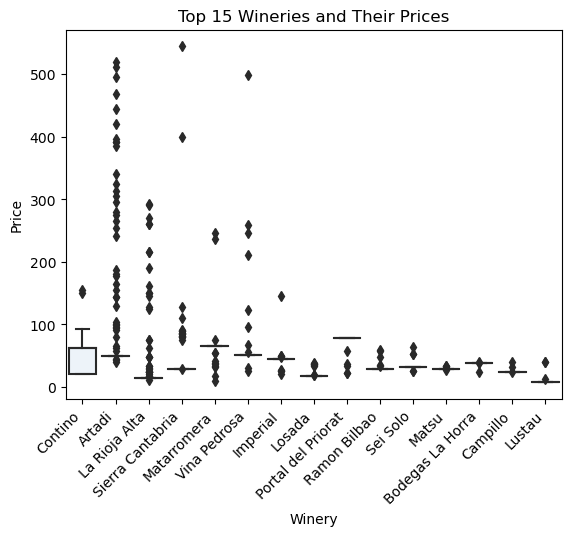

In [304]:
#Price Distribution in the top wineries
top_n = 15

top_n_wineries = wines['winery'].value_counts().head(top_n)
sns.boxplot(x=wines['winery'], y=wines['price'], order=top_n_wineries.index, palette='Blues')
plt.xticks(rotation=45, ha='right')

plt.xlabel('Winery')
plt.ylabel('Price')
plt.title(f'Top {top_n} Wineries and Their Prices')
plt.show()


Text(0.5, 1.0, 'Correlation of Body and Price (€))')

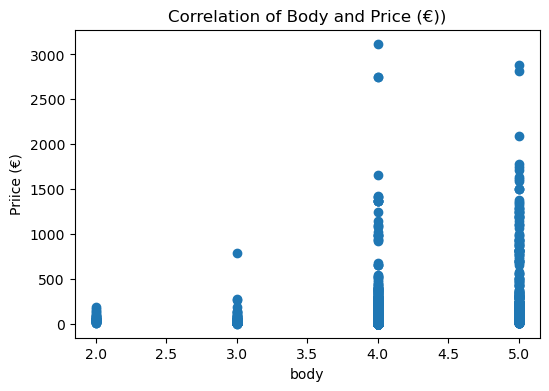

In [305]:
plt.figure(figsize=(6,4))
plt.scatter(wines['body'], wines['price']);
plt.xlabel('body')
plt.ylabel('Priice (€)')
plt.title('Correlation of Body and Price (€))')

Text(0.5, 1.0, 'Correlation of Rating and Price(€)')

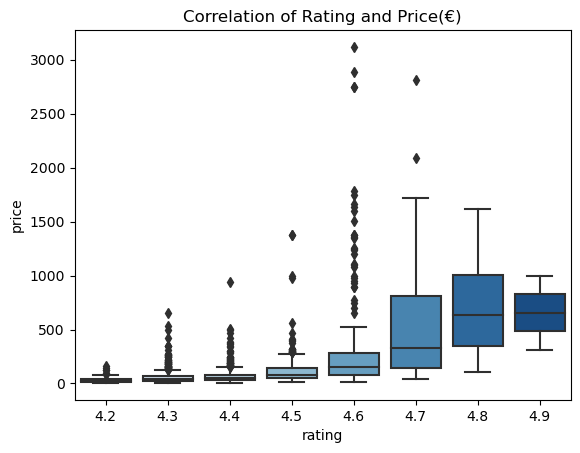

In [306]:
sns.boxplot(x=wines['rating'],y= wines['price'], palette='Blues')
plt.title('Correlation of Rating and Price(€)')

Text(0.5, 1.0, 'Correlation between Body and Acidity')

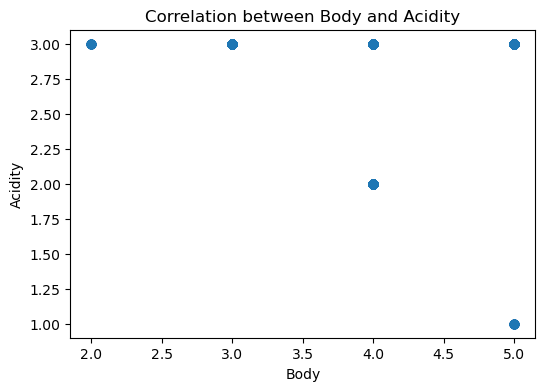

In [307]:
plt.figure(figsize=(6,4))
plt.scatter(wines['body'], wines['acidity']);
plt.xlabel('Body')
plt.ylabel('Acidity')
plt.title("Correlation between Body and Acidity")

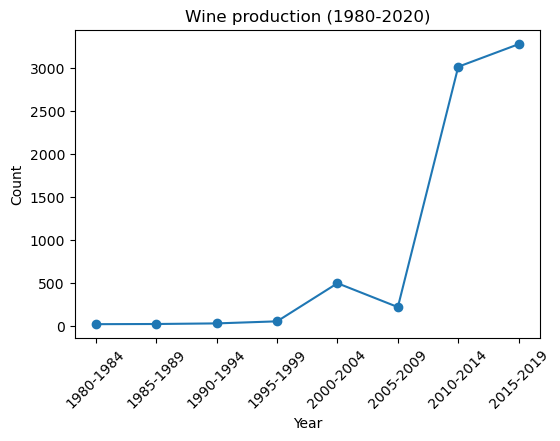

In [308]:
bins = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
wines['year'] = pd.to_numeric(wines['year'], errors='coerce')

wines['year_bins'] = pd.cut(wines['year'], bins=bins, labels=[f'{start}-{start+4}' for start in bins[:-1]])
count_acid = wines['year_bins'].value_counts().sort_index()  
plt.figure(figsize=(6, 4))
plt.plot(count_acid.index.astype(str), count_acid.values, marker='o')  
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Wine production (1980-2020)')
plt.xticks(rotation=45)
plt.show()


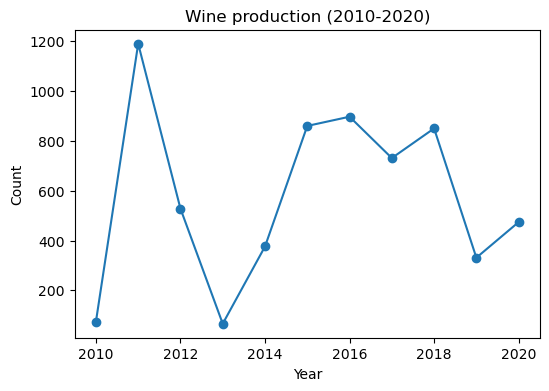

In [309]:
wines_2010_2020 = wines[wines['year'].between(2010,2020)]

count_year = wines_2010_2020['year'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.plot(count_year.index, count_year.values, marker='o')  
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Wine production (2010-2020)')

plt.show()

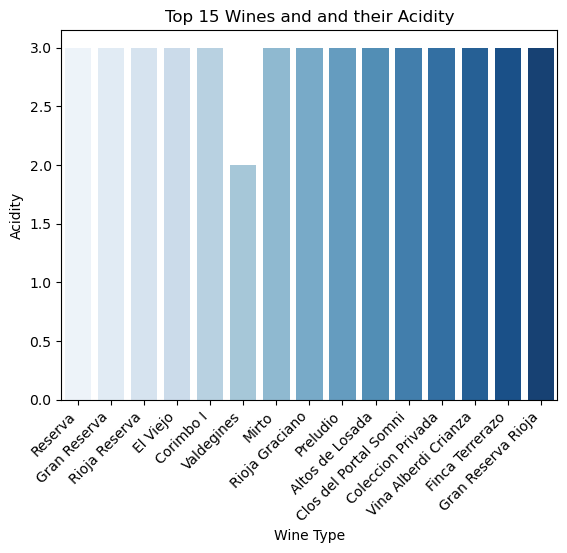

In [310]:
#Acidity and wine type
top_n = 15

top_n_wines = wines['wine'].value_counts().head(top_n)
sns.barplot(x=wines['wine'], y=wines['acidity'], order=top_n_wines.index, palette='Blues')
plt.xticks(rotation=45, ha='right')

plt.xlabel('Wine Type')
plt.ylabel('Acidity')
plt.title(f'Top {top_n} Wines and and their Acidity')
plt.show()


In [311]:
wines

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,year_bins
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,2010-2014
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,2015-2019
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,2005-2009
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,1995-1999
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,1995-1999
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016.0,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0,2015-2019
7496,Conreria d'Scala Dei,Les Brugueres,2018.0,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0,2015-2019
7497,Mustiguillo,Finca Terrerazo,2017.0,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0,2015-2019
7498,Matarromera,Gran Reserva,2011.0,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0,2010-2014


winery          480
wine            847
year             71
rating            8
num_reviews     817
country           1
region           76
price          1292
type             21
body              4
acidity           3

**Clustering the Data**

Now, we will cluster the wines based on variables: year, rating, body and acidity. The rest of the columns will be dropped

In [312]:
wines.dropna(inplace=True)

In [313]:
columns_to_drop = ['wine', 'winery', 'country', 'region', 'type', 'num_reviews', 'year_bins']
wines_dropped=wines[columns_to_drop]
wines_drop = wines.drop(columns=columns_to_drop)
wines_drop

,year,rating,price,body,acidity
0,2013.0,4.9,995.00,5.0,3.0
1,2018.0,4.9,313.50,4.0,2.0
2,2009.0,4.8,324.95,5.0,3.0
3,1999.0,4.8,692.96,5.0,3.0
4,1996.0,4.8,778.06,5.0,3.0
...,...,...,...,...,...
7495,2016.0,4.2,19.98,4.0,3.0
7496,2018.0,4.2,16.76,4.0,3.0
7497,2017.0,4.2,24.45,4.0,3.0
7498,2011.0,4.2,64.50,5.0,3.0


In [314]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn import set_config

# Output dataframes instead of arrays
set_config(transform_output="pandas")

preprocessor = make_column_transformer(
    (StandardScaler(), ['year', 'rating','price','body', 'acidity']),
    verbose_feature_names_out=False,
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['year', 'rating', 'price', 'body',
                                  'acidity'])],
                  verbose_feature_names_out=False)

In [315]:
wines

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,year_bins
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,2010-2014
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,2015-2019
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,2005-2009
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,1995-1999
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,1995-1999
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016.0,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0,2015-2019
7496,Conreria d'Scala Dei,Les Brugueres,2018.0,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0,2015-2019
7497,Mustiguillo,Finca Terrerazo,2017.0,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0,2015-2019
7498,Matarromera,Gran Reserva,2011.0,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0,2010-2014


In [316]:
wines_drop.dropna(inplace=True)


In [317]:
missing_count=wines_drop.isnull().sum()
missing_percentage = (missing_count / len(wines)) * 100
column_type= wines.dtypes
unique_data=wines.nunique()

missing_data = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage, "Data Type" : column_type}).sort_values(by='Missing Count', ascending=True)

print(missing_data)

             Missing Count  Missing Percentage Data Type
acidity                0.0                 0.0   float64
body                   0.0                 0.0   float64
price                  0.0                 0.0   float64
rating                 0.0                 0.0   float64
year                   0.0                 0.0   float64
country                NaN                 NaN    object
num_reviews            NaN                 NaN     int64
region                 NaN                 NaN    object
type                   NaN                 NaN    object
wine                   NaN                 NaN    object
winery                 NaN                 NaN    object
year_bins              NaN                 NaN  category


In [318]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

ks = range(1, 20)
n_init_value = 10

wssds = [
    make_pipeline(
    	preprocessor,
    	KMeans(n_clusters=k, n_init= n_init_value )
  # Create a new KMeans model with `k` clusters
    ).fit(wines_drop)[1].inertia_
    for k in ks
]

wines_clust_ks = pd.DataFrame({
    "k": ks,
    "wssd": wssds,
})

wines_clust_ks

,k,wssd
0,1,30055.000000
1,2,23469.298655
2,3,17921.871486
3,4,14248.551484
4,5,10725.631112
5,6,8481.290165
6,7,7291.355190
7,8,6209.618789
8,9,5599.658981
9,10,5039.545023


Text(0, 0.5, 'wssd')

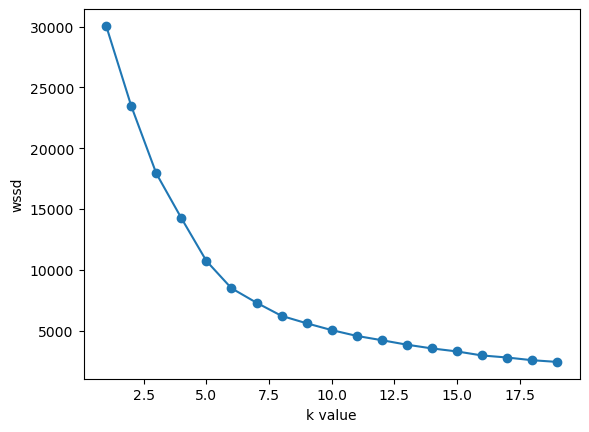

In [319]:
plt.plot(wines_clust_ks['k'], wines_clust_ks['wssd'], marker='o')
plt.xlabel('k value')
plt.ylabel('wssd')

In [320]:
#based on a grpah wiht set the number of clusters= 6
num_clusters= 7
n_init_value = 10

kmeans = KMeans(n_clusters=num_clusters, n_init=n_init_value, random_state=42)
wines_drop['cluster'] = kmeans.fit_predict(wines_drop[['year', 'rating','price','body', 'acidity']])
wines_drop

,year,rating,price,body,acidity,cluster
0,2013.0,4.9,995.00,5.0,3.0,5
1,2018.0,4.9,313.50,4.0,2.0,2
2,2009.0,4.8,324.95,5.0,3.0,2
3,1999.0,4.8,692.96,5.0,3.0,5
4,1996.0,4.8,778.06,5.0,3.0,5
...,...,...,...,...,...,...
7495,2016.0,4.2,19.98,4.0,3.0,0
7496,2018.0,4.2,16.76,4.0,3.0,0
7497,2017.0,4.2,24.45,4.0,3.0,0
7498,2011.0,4.2,64.50,5.0,3.0,4


In [321]:
wines["cluster"]= wines_drop["cluster"]
                

Text(0.5, 1.0, 'Number of wines in each cluster')

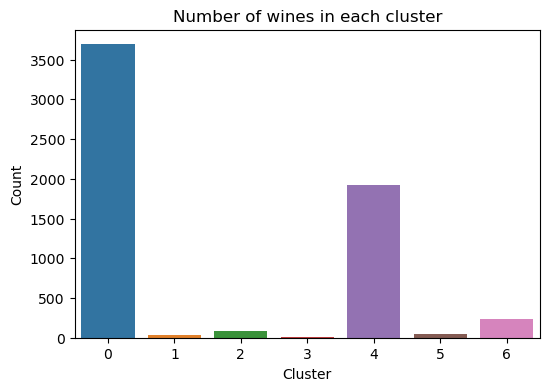

In [322]:
plt.figure(figsize=(6,4))
cluster_count=wines_drop['cluster'].value_counts()
sns.barplot(x= cluster_count.index, y=cluster_count.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title("Number of wines in each cluster")



As can be noticed above, the majority of wines are within cluster 0

In [323]:
wines.groupby('cluster').describe().T

cluster                       0            1            2            3  \
year        count   3692.000000    34.000000    84.000000     4.000000   
            mean    2015.352384  2005.352941  2008.440476  2008.750000   
            std        2.865945     9.021464     7.837739     3.201562   
            min     1988.000000  1982.000000  1982.000000  2004.000000   
            25%     2014.000000  1999.250000  2004.750000  2008.500000   
            50%     2016.000000  2005.000000  2010.000000  2010.000000   
            75%     2018.000000  2013.750000  2014.250000  2010.250000   
            max     2020.000000  2018.000000  2020.000000  2011.000000   
rating      count   3692.000000    34.000000    84.000000     4.000000   
            mean       4.221831     4.667647     4.600000     4.625000   
            std        0.060747     0.087803     0.146444     0.050000   
            min        4.200000     4.500000     4.300000     4.600000   
            25%        4.200000     4.600000     4.500000     4.600000   
            50%        4.200000     4.700000     4.600000     4.600000   
            75%        4.200000     4.700000     4.700000     4.625000   
            max        4.600000     4.800000     4.900000     4.700000   
num_reviews count   3692.000000    34.000000    84.000000     4.000000   
            mean     461.949350   138.588235   516.440476    55.750000   
            std      616.464957    96.883597   901.560713    38.055880   
            min       25.000000    28.000000    27.000000    27.000000   
            25%      390.000000    58.750000    68.750000    27.750000   
            50%      410.000000   117.000000   120.500000    44.000000   
            75%      420.000000   193.000000   404.250000    72.000000   
            max    16505.000000   410.000000  3521.000000   108.000000   
price       count   3692.000000    34.000000    84.000000     4.000000   
            mean      24.222973  1381.240882   384.820252  2858.310000   
            std        7.211518   175.410769    82.013857   176.458048   
            min        6.990000  1150.000000   282.650000  2750.000000   
            25%       17.900000  1250.587500   315.000000  2750.000000   
            50%       23.950000  1365.945000   364.820000  2782.080000   
            75%       28.530000  1480.740000   440.425000  2890.390000   
            max       44.270000  1785.960000   584.430000  3119.080000   
body        count   3692.000000    34.000000    84.000000     4.000000   
            mean       4.076381     4.676471     4.476190     4.250000   
            std        0.608897     0.474858     0.502432     0.500000   
            min        2.000000     4.000000     4.000000     4.000000   
            25%        4.000000     4.000000     4.000000     4.000000   
            50%        4.000000     5.000000     4.000000     4.000000   
            75%        4.000000     5.000000     5.000000     4.250000   
            max        5.000000     5.000000     5.000000     5.000000   
acidity     count   3692.000000    34.000000    84.000000     4.000000   
            mean       2.991062     3.000000     2.833333     3.000000   
            std        0.117207     0.000000     0.374916     0.000000   
            min        1.000000     3.000000     2.000000     3.000000   
            25%        3.000000     3.000000     3.000000     3.000000   
            50%        3.000000     3.000000     3.000000     3.000000   
            75%        3.000000     3.000000     3.000000     3.000000   
            max        3.000000     3.000000     3.000000     3.000000   

cluster                      4            5            6  
year        count  1923.000000    43.000000   231.000000  
            mean   2011.145086  1999.720930  2007.021645  
            std       4.559271    10.762204     9.165363  
            min    1985.000000  1981.000000  1981.000000  
            25%    2010.000000  1989.500000  2002.000000  
            50%    

Text(0.5, 1.0, 'Distribution of price for each cluster')

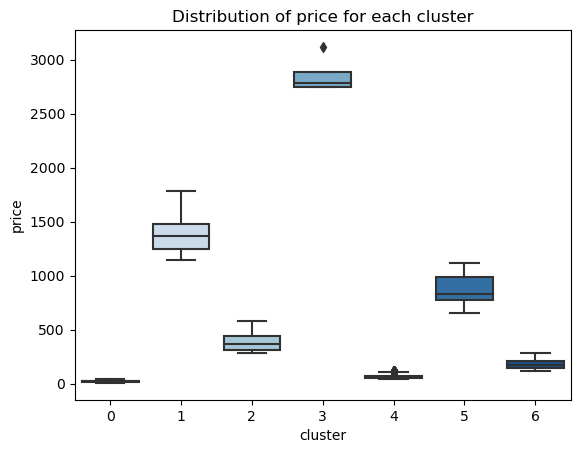

In [324]:
sns.boxplot(x=wines['cluster'],y= wines['price'], palette='Blues')
plt.title('Distribution of price for each cluster')

Text(0.5, 1.0, 'Distribution of year for each cluster')

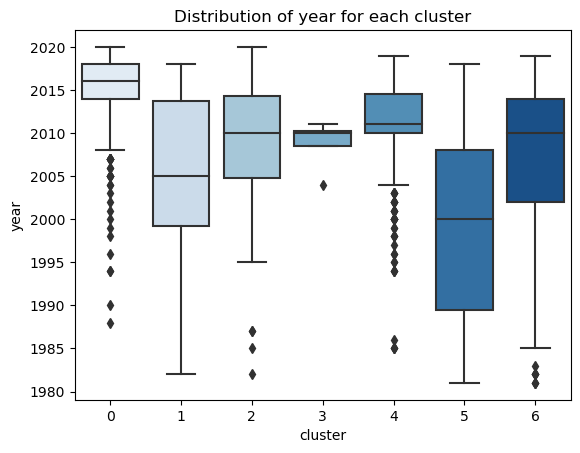

In [325]:
sns.boxplot(x=wines['cluster'],y= wines['year'], palette='Blues')
plt.title('Distribution of year for each cluster')


Text(0.5, 1.0, 'Mean acidity for each each cluster')

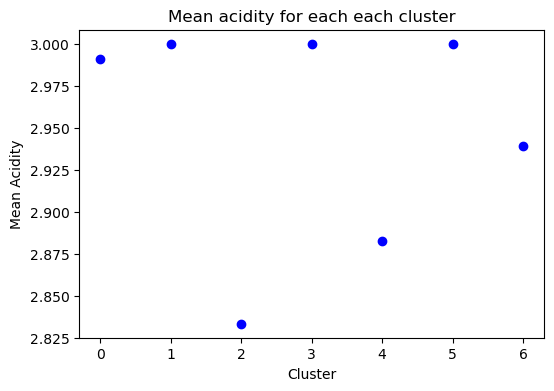

In [326]:
cluster_means_acid = wines.groupby('cluster')['acidity'].mean().reset_index()
plt.figure(figsize=(6,4))
plt.scatter(cluster_means_acid['cluster'], cluster_means_acid['acidity'], color='blue')
plt.xlabel('Cluster')
plt.ylabel('Mean Acidity')
plt.title("Mean acidity for each each cluster")

Text(0.5, 1.0, 'Mean Body for each each cluster')

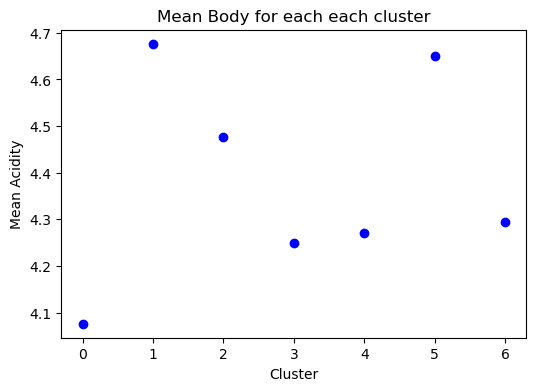

In [327]:
cluster_means_body = wines.groupby('cluster')['body'].mean().reset_index()
plt.figure(figsize=(6,4))
plt.scatter(cluster_means_body['cluster'], cluster_means_body['body'], color='blue')
plt.xlabel('Cluster')
plt.ylabel('Mean Acidity')
plt.title("Mean Body for each each cluster")

Text(0.5, 1.0, 'Mean rating for each each cluster')

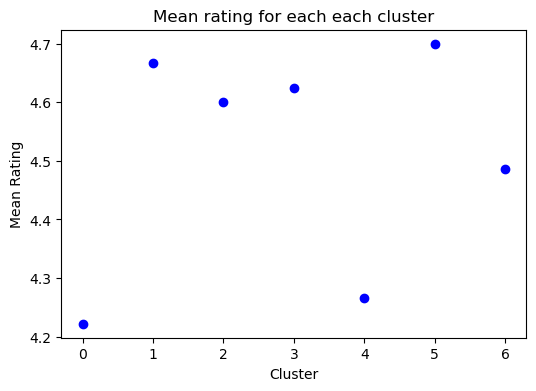

In [328]:
cluster_means_rating = wines.groupby('cluster')['rating'].mean().reset_index()
plt.figure(figsize=(6,4))
plt.scatter(cluster_means_rating['cluster'], cluster_means_rating['rating'], color='blue')
plt.xlabel('Cluster')
plt.ylabel('Mean Rating')
plt.title("Mean rating for each each cluster")

*Price*


We can notice that there is a high correlation between clusters and variables. Cluster 0, is characterized by the lowest average price and the highest number of wines. Cluster 3 on the other hand, has the smallest amount of wines, with the highest price point. 


*Year*

The wines in cluster 0 are the youngest, which correlates with low price and the highest count number.

*Body*

Cluster 0, has the lowest average body, meaning that these wines are relatively lighter and easier to drink.


*Rating*

Interesting trend may be noticed in cluster 5, since it has wines with the highest rating, and much lower on average prices than cluster 3. 

Text(0.5, 1.0, 'Top wineries in cluster 3')

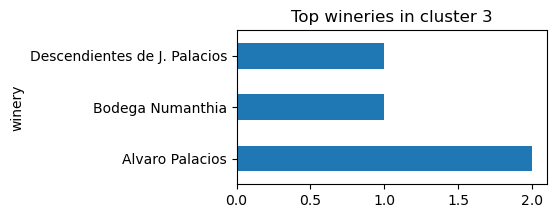

In [329]:
plt.figure(figsize=(4,2))
wines[wines['cluster']==3].groupby('winery')['winery'].count().plot.barh()
plt.title("Top wineries in cluster 3")

Text(0.5, 1.0, 'Top regions types in cluster 3')

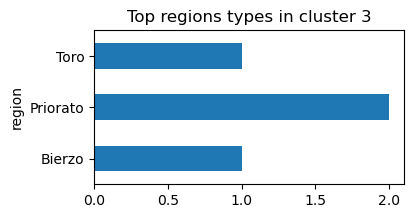

In [330]:

plt.figure(figsize=(4,2))
wines[wines['cluster']==3].groupby('region')['region'].count().plot.barh()
plt.title("Top regions types in cluster 3")

Text(0.5, 1.0, 'Top wine types in cluster 3')

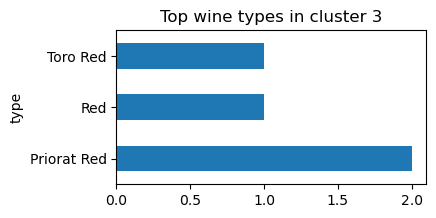

In [331]:
plt.figure(figsize=(4,2))
wines[wines['cluster']==3].groupby('type')['type'].count().plot.barh()
plt.title("Top wine types in cluster 3")

*type red represents a red blend

## Conclusions

It seems that the clustering is mostly dependant on price, year and rating of wines. We got a good idea on a numbers behind the wine market in the country. More expensive wine ten to be older, have higher ratings, and these can be found in clusters 1, 3, 5. 

It is worth to notice, that within cluster 1, 2 and 3, wines in cluster 3 have the lowest average price, while having high ratings and old production. It may mean that these wine types and wineries are worth further exploration in the context of the market and sales.

Citation:

fedesoriano. (April 2022). Spanish Wine Quality Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset